# Crude Model of Evolution by Natural Selection

#### A very crude model of evolution by natural selection.

Natural selection exerts a selection pressure on a population. Genetic mutation is random (almost).<br>
At every generation, the genes that are most likely to survive are passed on to the next generation. Over time, this selection pressure causes the characteristics to slowly change. Given enough time, the successive generations change so much that they are considerably different from the initial population. This is how new species are formed. The process is called speciation.

In this model we start with a population with a fixed number of characteristics of interest. We also define an optimal curve towards which the selection pressure acts.<br>

At each generation we calculate new values for each feature in each individual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cha = np.arange(1, 21) #number of characteristics/features to consider
val = np.random.normal(14, scale = 4, size = len(cha)) #assign random values to those characteristics with some mean.
#This are the optimal values for each characteristic/feature.

cha, val

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([14.42506735, 13.29172285, 14.25881668, 13.23694052, 11.62082662,
        19.1186239 , 13.88128983, 14.20953356, 17.61315924, 20.38228782,
        14.04553357,  9.74291882, 10.16457887, 10.39772638, 10.50749028,
        12.39525318, 14.48319163, 14.15649177, 11.04544281, 16.53175362]))

In [3]:
def create_pop(pop_size = 1000, mean = 0):
    """Create a population of given size and with a given mean"""
    
    pop = []
    for i in range(pop_size):
        pop.append((np.arange(1, len(cha)+1), np.random.normal(mean, size = len(cha))))
    
    return pop

pop = create_pop() #Create a population

In [4]:
def select_next_gen(percentage = 10):
    
    """Returns the indices of individuals with features closest to the optimal curve
    and average difference between generation and optimum"""
    
    a = round(len(pop) * (percentage / 100)) #number of individuals that can have offspring
    
    diff = []
    for i in range(len(pop)):
        diff.append(np.sum(np.abs(pop[i][1] - val)))  #calculate overall difference from optimal value
        
    ave_diff = np.average(diff)

    indices = []
    for i in range(a):
        indices.append(diff.index(min(diff)))
        diff[indices[i]] = max(diff)
    
    return indices, ave_diff

#indices, ave_diff = select_next_gen()

In [5]:
def create_offspring(indices, max_pop = 1000):
    """Create offspring using features of selected parents"""
    
    off_per_parent = round(max_pop / len(indices)) #number of offsprings per parent

    new_pop = []
    for i in indices: #calculate new values for each feature in each individual
        for k in range(off_per_parent):
            val = []
            for j in range(len(cha)):
                mean = pop[i][1][j]
                val.append(np.random.normal(mean))
            new_pop.append((np.arange(1, len(cha)+1), val))
            
    return new_pop


#pop = create_offspring(indices)


In [6]:
def subplot(k):
    ave = []
    for i in range(len(cha)):
        sum = 0
        for j in range(len(pop)):
            sum += pop[j][1][i]
        ave.append(sum / len(pop)) #calculate average values for population
        
        
    #plt.figure(figsize=(20,20))
    global plot_no
    plt.subplot(4,2,plot_no)
    plot_no += 1
    
    for i in range(len(pop)):
        plt.plot(pop[i][0], pop[i][1], 'o')
    plt.plot(cha, val)
    plt.plot(cha, ave)
    plt.xlabel('Features')
    plt.ylabel('Values')
    title = str('Values of Features with Optimal Curve [Gen ' + str(k) + ']')
    plt.title(title)

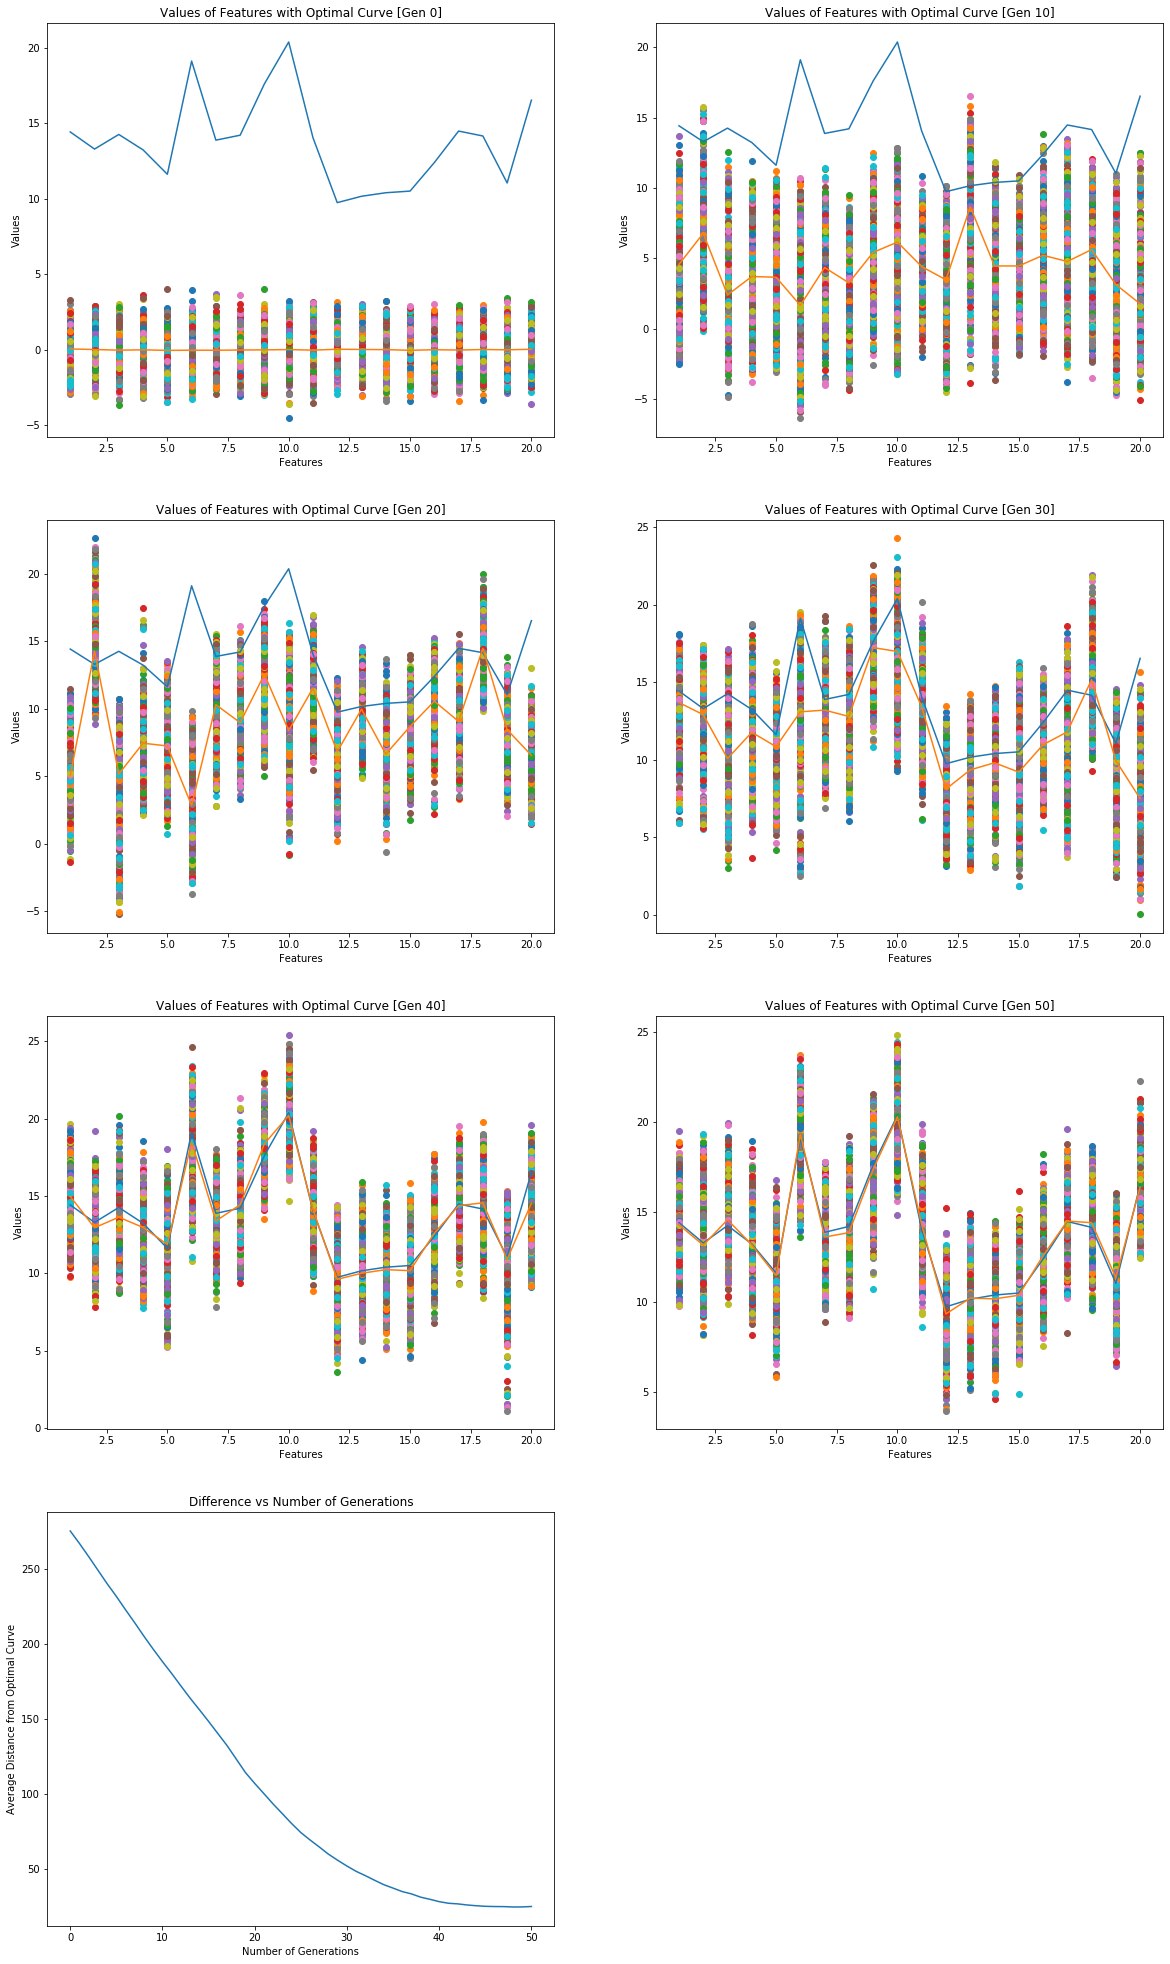

In [7]:
no_of_gen = 51
plot_no = 1 #start from 1


ave_diff = []

plt.figure(figsize=(20,35))

for i in range(no_of_gen):
    
    if (i % 10) == 0: #plot after 10 generations
        subplot(i)
    
    (indices, diff_ave) = select_next_gen()
    ave_diff.append(diff_ave)
    
    pop = create_offspring(indices)
    
plt.subplot(4,2,plot_no)
plt.plot(np.arange(0, len(ave_diff)), ave_diff)
plt.xlabel('Number of Generations')
plt.ylabel('Average Distance from Optimal Curve')
plt.title('Difference vs Number of Generations')
#plt.savefig('fig1.pdf')
#plt.savefig('fig1.png')
plt.show()